In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')                                                   # mounting google drive to the file to access the data

Mounted at /content/drive


In [ ]:
# installing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import string
import nltk
from nltk import punkt
import nltk.downloader
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 

In [ ]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 8.9 MB/s 
     |████████████████████████████████| 2.0 MB 59.6 MB/s 


In [ ]:
import textstat

In [ ]:
root_dir = 'drive/My Drive'                                                     # root directory of the dataset
local_path = '/ISOT/'                                                           # folder of the stored ISOT dataset
data_dir = root_dir + local_path


data_path_real = data_dir + 'True.csv'                                          # defined path to the training data for real news
data_path_fake = data_dir + 'Fake.csv'                                          # defined path to the training data for fake news

In [ ]:
train_set_real= pd.read_csv(data_path_real)                                     # reading the csv file for real news content
train_set_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
train_set_real = train_set_real.assign(label='1')                               # adding label 1 for all news thats real
train_set_real.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [ ]:
train_set_real.shape

(21417, 5)

In [ ]:
train_set_real.isnull().sum()                                                   # checking for null values in all columns of real news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_real.title.duplicated().sum()                                               # checking for duplicated values in all columns of real news

591

In [ ]:
train_set_real.text.duplicated().sum() 

225

In [ ]:
train_set_real.duplicated().sum() 

206

In [ ]:
train_set_real.drop_duplicates()                                                # dropping duplicates in all columns of real news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
train_set_fake= pd.read_csv(data_path_fake)                                     # reading the csv file for fake news content
train_set_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [ ]:
train_set_fake = train_set_fake.assign(label='0')                               # adding label 0 for all news thats fake
train_set_fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [ ]:
train_set_fake.shape

(23481, 5)

In [ ]:
train_set_fake.isnull().sum()                                                   # checking for null values in all columns of fake news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_fake.title.duplicated().sum()                                         # checking for duplicated values in all columns of fake news

5578

In [ ]:
train_set_fake.text.duplicated().sum()    

6026

In [ ]:
train_set_fake.duplicated().sum()  

3

In [ ]:
train_set_fake.drop_duplicates()                                                # dropping duplicates in all columns of fake news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
n = len(train_set_fake)

text_len = []

for i in range(n):
  textstat.remove_punctuation(train_set_fake['text'][i])
  readability_scores = textstat.flesch_reading_ease(train_set_fake['text'][i])
  text_len.append(readability_scores)

print(np.mean(text_len))

62.06026617265023


In [ ]:
n = len(train_set_real)

text_len = []

for i in range(n):
  textstat.remove_punctuation(train_set_real['text'][i])
  readability_scores = textstat.flesch_reading_ease(train_set_real['text'][i])
  text_len.append(readability_scores)

print(np.mean(text_len))

51.91670355325209


subject
politicsNews    11272
worldnews       10145
Name: text, dtype: int64


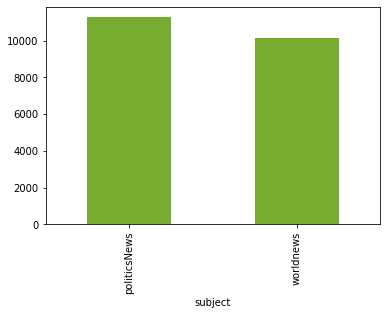

In [ ]:
print(train_set_real.groupby(['subject'])['text'].count())

train_set_real.groupby(['subject'])['text'].count().plot(kind="bar", color='#77AC30')
plt.show()

subject
Government News    1570
Middle-east         778
News               9050
US_News             783
left-news          4459
politics           6841
Name: text, dtype: int64


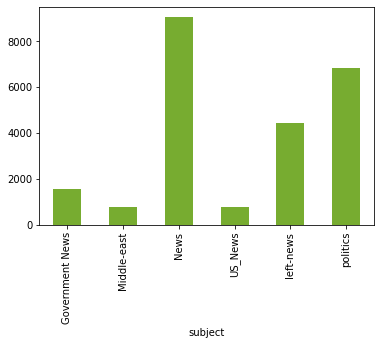

In [ ]:
print(train_set_fake.groupby(['subject'])['text'].count())

train_set_fake.groupby(['subject'])['text'].count().plot(kind="bar", color='#77AC30')
plt.show()

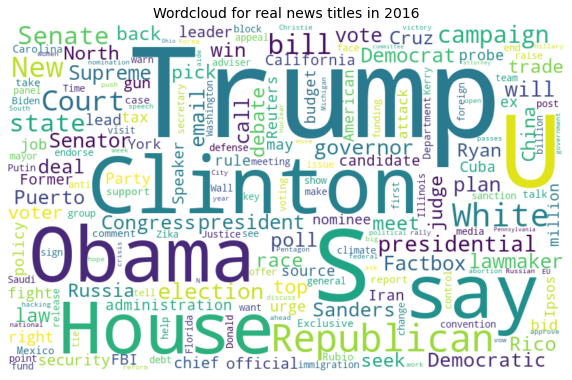

In [ ]:
# generating word cloud for real news titles of 2016

title_real = train_set_real[train_set_real['date'].str.contains('2016')].title
all_real_titles = ' '.join(title_real)                                          # joining all titles of real news
real_wordcloud = WordCloud(background_color='white', width= 800, height= 500, max_font_size = 180, collocations = False).generate(all_real_titles)

plt.figure(figsize=(10,8))
plt.title('Wordcloud for real news titles in 2016', fontsize = 14)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

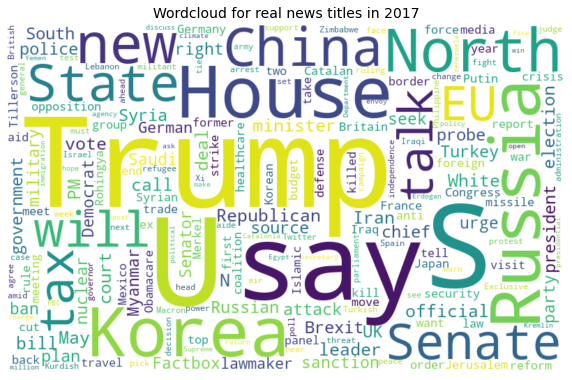

In [ ]:
# generating word cloud for real news titles of 2017

title_real = train_set_real[train_set_real['date'].str.contains('2017')].title
all_real_titles = ' '.join(title_real)                                          # joining all titles of real news
real_wordcloud = WordCloud(background_color='white', width= 800, height= 500, max_font_size = 180, collocations = False).generate(all_real_titles)

plt.figure(figsize=(10,8))
plt.title('Wordcloud for real news titles in 2017', fontsize = 14)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

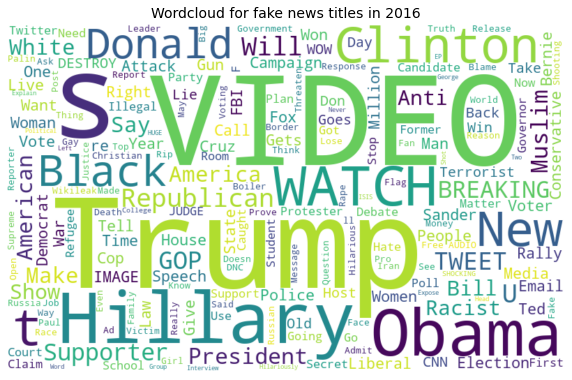

In [ ]:
# generating word cloud for fake news titles of 2016

title_fake = train_set_fake[train_set_fake['date'].str.contains('2016')].title
all_fake_titles = ' '.join(title_fake)                                          # joining all titles of fake news
fake_wordcloud = WordCloud(background_color='white', width= 800, height= 500, max_font_size = 180, collocations = False).generate(all_fake_titles)

plt.figure(figsize=(10,8))
plt.title('Wordcloud for fake news titles in 2016', fontsize = 14)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

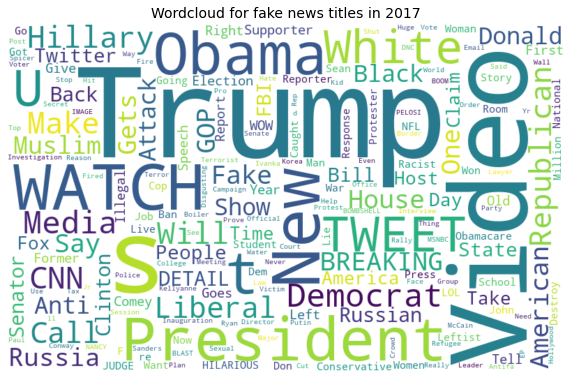

In [ ]:
# generating word cloud for fake news titles of 2017

title_fake = train_set_fake[train_set_fake['date'].str.contains('2017')].title
all_fake_titles = ' '.join(title_fake)                                          # joining all titles of fake news
fake_wordcloud = WordCloud(background_color='white', width= 800, height= 500, max_font_size = 180, collocations = False).generate(all_fake_titles)

plt.figure(figsize=(10,8))
plt.title('Wordcloud for fake news titles in 2017', fontsize = 14)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

About Real news
Number of titles: 21417
Maximum length of the title in words: 20
Mean length of the titles: 9.954475416725032


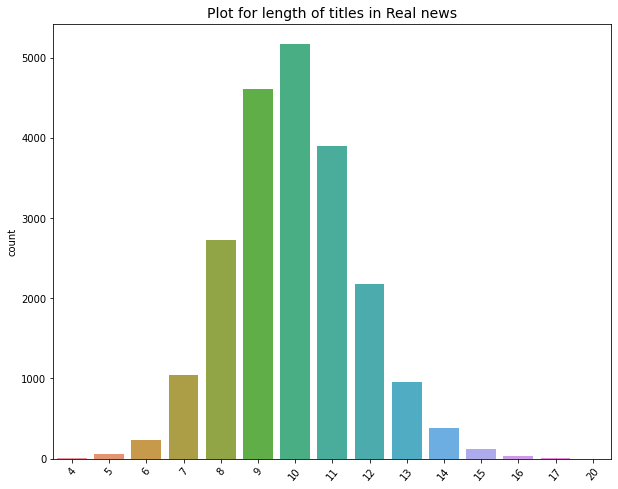

In [ ]:
# finding mean and maximum length of titles in real news
titles = train_set_real.title

max_len = 0
title_len = []
for title in titles:
    title_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('About Real news')
print('Number of titles:', len(titles))
print('Maximum length of the title in words:', max_len)
print('Mean length of the titles:', np.mean(title_len))

plt.figure(figsize=(10,8))
plt.title('Plot for length of titles in Real news', fontsize = 14)
graph_real = sns.countplot(x=title_len)
graph_real.set_xticklabels(graph_real.get_xticklabels(), rotation=50)
plt.show()

About Fake news
Number of titles: 23481
Maximum length of the title in words: 42
Mean length of the titles: 14.732805246795282


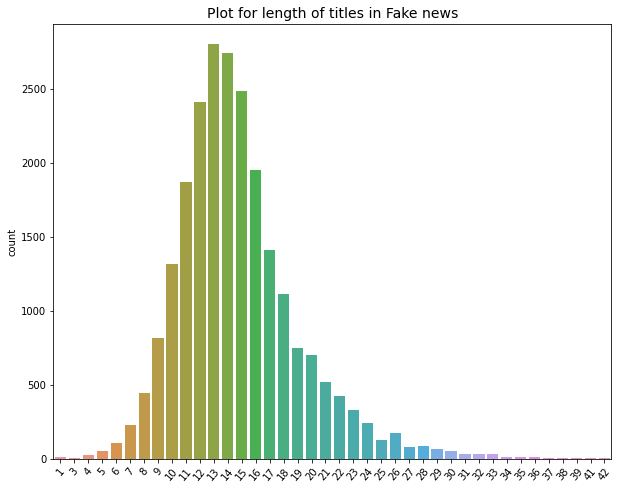

In [ ]:
# finding mean and maximum length of titles in fake news
titles = train_set_fake.title

max_len = 0
title_len = []
for title in titles:
    title_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('About Fake news')
print('Number of titles:', len(titles))
print('Maximum length of the title in words:', max_len)
print('Mean length of the titles:', np.mean(title_len))

plt.figure(figsize=(10,8))
plt.title('Plot for length of titles in Fake news', fontsize = 14)
graph_fake = sns.countplot(x=title_len)
graph_fake.set_xticklabels(graph_fake.get_xticklabels(), rotation=50)
plt.show()

In [ ]:
# finding mean and maximum length of texts in real news
texts = train_set_real.text

max_len = 0
text_len = []
for text in texts:
    text_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

print('About Real news')
print('Number of texts:', len(titles))
print('Maximum length of the text in words:', max_len)
print('Mean length of the texts:', np.mean(text_len))


About Real news
Number of texts: 23481
Maximum length of the text in words: 5172
Mean length of the texts: 385.6400989867862


In [ ]:
# finding mean and maximum length of texts in fake news
texts = train_set_fake.text

max_len = 0
text_len = []
for text in texts:
    text_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

print('About Fake news')
print('Number of text:', len(texts))
print('Maximum length of the text in words:', max_len)
print('Mean length of the text:', np.mean(text_len))


About Fake news
Number of text: 23481
Maximum length of the text in words: 8135
Mean length of the text: 423.1979046888974
